In [ ]:
#reload_ext autoreload
#autoreload
#matplotlib inline

In [3]:
import pathlib
plt = platform.system()
if plt == 'Linux': pathlib.WindowsPath = pathlib.PosixPath

In [4]:
DATASET_PATH = Path(r"C:\Users\anton\Desktop\ML\fluorescence_id")

In [5]:
# Transformations are applied only on training dataset
mask_datablock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=100),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.3),
    batch_tfms=aug_transforms(mult=2)
)

dls = mask_datablock.dataloaders(DATASET_PATH)
# dls.train.show_batch(max_n=4, nrows=1, unique=True)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


C:\Users\anton\miniconda3\lib\site-packages\torch\_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ..\aten\src\ATen\native\BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


In [6]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

C:\Users\anton\miniconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [7]:
#learn.fine_tune(4, base_lr=10**-3)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.892767,0.084648,0.019553,04:01


epoch,train_loss,valid_loss,error_rate,time
0,0.294334,0.492532,0.153631,04:09
1,0.143563,0.032382,0.002793,04:30
2,0.086199,0.001902,0.000000,04:05
3,0.051965,0.004237,0.002793,04:41


In [ ]:
lr_min,lr_steep = learn.lr_find()
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

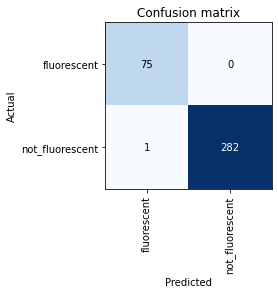

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(10, nrows=10)

In [9]:
# Uncomment to export the model

import pathlib
plt = platform.system()
if plt == 'Linux': pathlib.WindowsPath = pathlib.PosixPath
    
learn.export()

In [ ]:
learn.save('first')

In [ ]:
# GRADIO DEMO

# from fastgradio import Demo

# Demo(learn).launch(interpretation = "default", title="Fluorescence identification")

In [ ]:
# Gradio web app

# fluo_id_web = gr.Interface(fn = "learn",
#                           inputs = "image",
#                           outputs= "text", 
#                           interpretation = "default",
#                           title="Fluorescence identification")